# pH Values, in Veg Data

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.power import FTestPower


# Data Dictionary

| Column           | Data Type | Description                                                       |
|------------------|-----------|-------------------------------------------------------------------|
| `S. no.`         | `int64`   | Serial number, a unique identifier for each row                   |
| `Name`           | `object`  | Name of the vegetable                                             |
| `Soil_Type`      | `object`  | Type of soil in which the vegetable is grown                      |
| `Fertility`      | `object`  | Fertility status of the soil                                      |
| `Photoperiod`    | `object`  | Duration of light exposure the vegetable receives                 |
| `N-P-K Ratio`    | `object`  | Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil |
| `Temperature`    | `float64` | Average temperature (in degrees Celsius)                          |
| `Rainfall`       | `float64` | Amount of rainfall (in millimeters)                               |
| `pH`             | `float64` | pH level of the soil                                              |
| `Light_Hours`    | `float64` | Number of light hours per day                                     |
| `Light_Intensity`| `float64` | Intensity of light received (in lumens)                           |
| `Rh`             | `float64` | Relative humidity (percentage)                                    |
| `Yield`          | `float64` | Yield of the vegetable (100 g per hectare)                      |
| `Season`         | `object`  | Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall) |


### General EDA

In [63]:
veg_data = pd.read_csv('/Users/kamiasalango/Desktop/Milan_Data_Urban_Ag/synthetic_veg_normal_crop_data.csv')

In [64]:
veg_data.head(2)

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,22.489987,495.524098,6.272267,7.398897,529.733246,53.334987,60.647800,Fall
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.008877,454.428932,6.377733,6.625545,667.273615,57.410295,60.624575,Spring


In [53]:
veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   Soil_Type        1000 non-null   object 
 3   Fertility        1000 non-null   object 
 4   Photoperiod      1000 non-null   object 
 5   N-P-K Ratio      1000 non-null   object 
 6   Temperature      1000 non-null   float64
 7   Rainfall         1000 non-null   float64
 8   pH               1000 non-null   float64
 9   Light_Hours      1000 non-null   float64
 10  Light_Intensity  1000 non-null   float64
 11  Rh               1000 non-null   float64
 12  Yield            1000 non-null   float64
 13  Season           1000 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB


In [54]:
#check for nulls 
veg_data.isnull().sum()

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Yield              0
Season             0
dtype: int64

### Categorical Variables

The following variables can be considered categorical 
 - `S. no.` (int64): Serial number, a unique identifier for each row
- `Name` (object): Name of the vegetable
- `Soil_Type` (object): Type of soil in which the vegetable is grown
- `Fertility` (object): Fertility status of the soil
- `Photoperiod` (object): Duration of light exposure the vegetable receives
- `Season` (object): Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall)

In [22]:
veg_data['Season'].unique()

array([' Fall', 'Spring', ' Summer',
       ' Fall                                                                         ',
       ' Summer                                           ', 'Fall',
       'Winter', ' Winter', ' Fall      '], dtype=object)

In [23]:
#Clean up whitespace in 'Season' values
veg_data['Season'] = veg_data['Season'].str.strip().str.replace('\s+', ' ')

### Continuous, Numeric Variables

- `Temperature` (float64): Average temperature (in degrees Celsius)
- `Rainfall` (float64): Amount of rainfall (in millimeters)
- `pH` (float64): pH level of the soil
- `Light_Hours` (float64): Number of light hours per day
- `Light_Intensity` (float64): Intensity of light received (in lumens)
- `Rh` (float64): Relative humidity (percentage)
- `Yield` (float64): Yield of the vegetable (in tons per hectare)
- `N-P-K Ratio` (object): Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil

In [24]:
#basic descriptive stats:
veg_data.describe()

,S. no.,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.500000,21.223453,899.822311,6.314535,7.788497,454.160624,62.491512,25.407443
std,2.873719,3.388224,248.827272,0.387982,1.081211,107.980401,9.444966,14.874399
min,1.000000,9.382705,408.922109,4.869373,5.916419,208.199107,41.949928,4.648454
25%,3.000000,19.107643,717.766522,6.093833,6.929032,377.061951,54.588245,18.978198
50%,5.500000,21.100561,895.413750,6.339494,7.277581,434.972823,60.628367,24.174195
75%,8.000000,23.949001,1047.528260,6.556465,8.862176,534.277933,70.848804,29.416648
max,10.000000,31.246506,1634.156080,7.397805,11.594160,802.796178,94.308429,65.126196


## pH

In [55]:
#define function to assign labels to Ph values
def assign_ph_label(ph_value):
    if ph_value < 5.5:
        return 'High Acidic'
    elif 5.5 <= ph_value < 6.5:
        return 'Acidic'
    elif 6.5 <= ph_value < 7.5:
        return 'Neutral'
    elif 7.5 <= ph_value < 8.5:
        return 'Alkaline'
    else:
        return 'High Alkaline'

In [65]:
veg_data['pH_Label'] = veg_data['pH'].apply(assign_ph_label)

#### pH Distribution per Vegetable

In [66]:
veg_data['pH_Label']

0      Acidic
1      Acidic
2      Acidic
3      Acidic
4      Acidic
        ...  
995    Acidic
996    Acidic
997    Acidic
998    Acidic
999    Acidic
Name: pH_Label, Length: 1000, dtype: object

In [67]:
#distribution of labels and associated vegetable 
label_distribution = veg_data.groupby(['Name', 'pH_Label']).size().unstack(fill_value=0)
print(label_distribution)


pH_Label        Acidic  High Acidic  Neutral
Name                                        
Asparagus           95            0        5
Broccoli            44            0       56
Cabbage             16            0       84
Cauliflowers        54            0       46
Chilli Peppers      96            0        4
Cucumbers           18            0       82
Eggplants           96            0        4
Green Peas          85            0       15
Potatoes            73           27        0
Tomatoes            95            0        5


In [28]:
#distribution of continious pH and vegetable
cont_stats = veg_data.groupby('Name')['pH'].describe()
print(cont_stats)

                count      mean       std       min       25%       50%  \
Name                                                                      
Asparagus       100.0  6.346015  0.107233  6.061796  6.284878  6.341769   
Broccoli        100.0  6.513211  0.157678  6.143281  6.400573  6.514724   
Cabbage         100.0  6.758387  0.254208  6.089276  6.593666  6.747294   
Cauliflowers    100.0  6.494089  0.175295  6.070728  6.372317  6.473891   
Chilli Peppers  100.0  6.154652  0.198944  5.727542  6.012622  6.148576   
Cucumbers       100.0  6.741400  0.260841  6.136454  6.577165  6.722876   
Eggplants       100.0  6.144058  0.206452  5.737192  5.995257  6.166610   
Green Peas      100.0  6.236779  0.254468  5.580126  6.092907  6.220417   
Potatoes        100.0  5.589057  0.210531  4.869373  5.488421  5.601350   
Tomatoes        100.0  6.167698  0.238268  5.655158  6.006855  6.182478   

                     75%       max  
Name                                
Asparagus       6.423751 

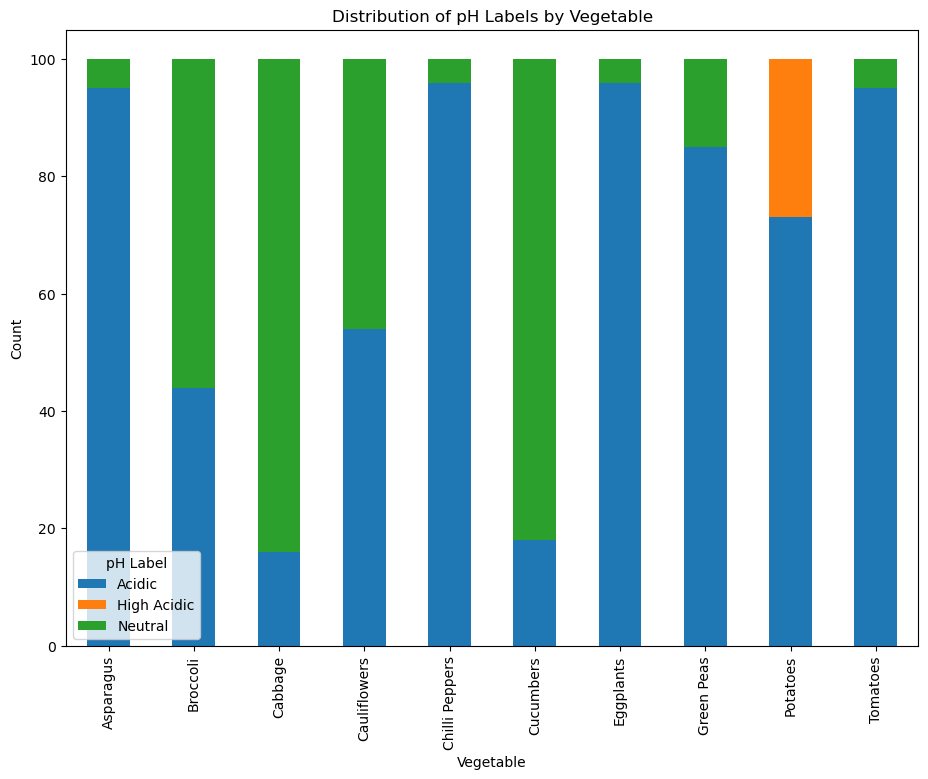

In [48]:
label_distribution.plot(kind='bar', stacked=True, figsize=(11, 8))
plt.title('Distribution of pH Labels by Vegetable')
plt.xlabel('Vegetable')
plt.ylabel('Count')
plt.legend(title='pH Label')
plt.show()


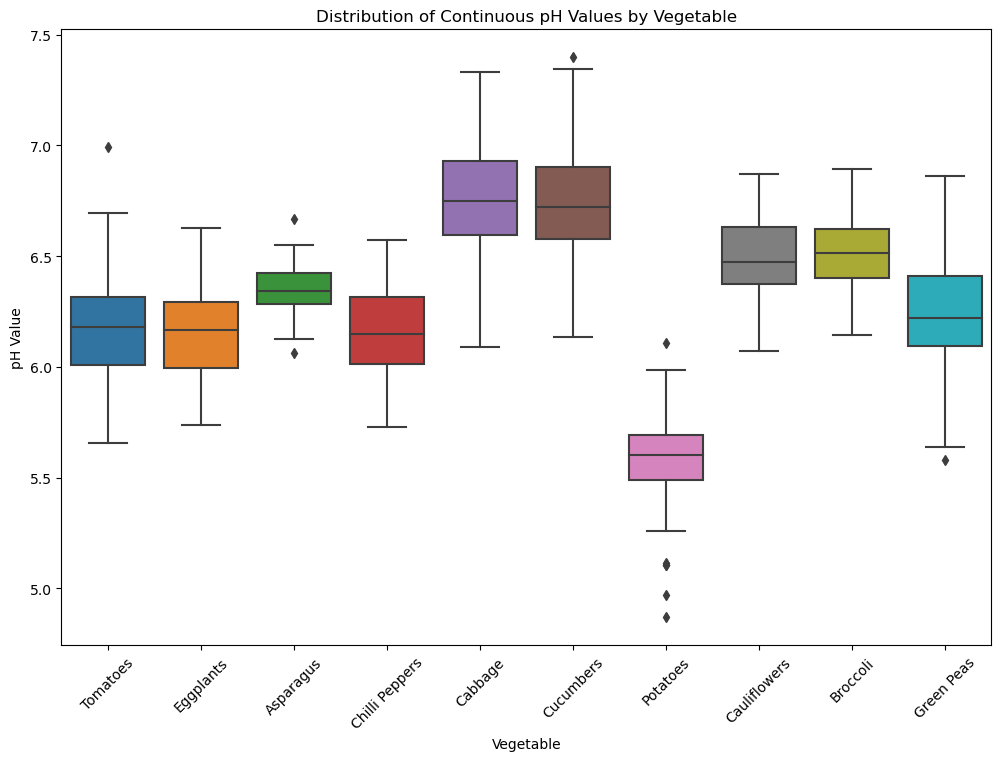

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='pH', data=veg_data)
plt.title('Distribution of Continuous pH Values by Vegetable')
plt.xlabel('Vegetable')
plt.ylabel('pH Value')
plt.xticks(rotation=45)
plt.show()

### Summary and Insights

#### Labeled pH Distribution
- **Acidic**: The majority of the vegetables fall into the "Acidic" category, especially Asparagus (95%), Chilli Peppers (96%), and Eggplants (96%).
- **High Acidic**: Only Potatoes have a significant proportion in the "High Acidic" category (27%).
- **Neutral**: Vegetables like Cabbage (84%) and Cucumbers (82%) have higher proportions in the "Neutral" category.

#### Continuous pH Values
- **Mean pH**: The mean pH values show variability across vegetables, with Cucumbers having the highest mean pH (6.74) and Potatoes the lowest (5.59).
- **Standard Deviation**: The standard deviation indicates the variability in pH values, Cucumbers show the highest variability. 

**Notes** 

How were min and max assigned for each vegetable? 

#### pH and yield per vegetable

In [41]:
fig_scatter = px.scatter(
    veg_data, 
    x='pH', 
    y='Yield', 
    color='Name', 
    title='Yield vs Continuous pH Values per Vegetable',
    labels={'pH': 'pH Value', 'Yield': 'Yield'},
    hover_data=['Name', 'pH', 'Yield']
)

fig_scatter.show()

In [38]:
import plotly.express as px
import plotly.graph_objects as go


In [39]:
fig_box = px.box(
    veg_data, 
    x='pH_Label', 
    y='Yield', 
    color='Name', 
    title='Yield vs Labeled pH Values per Vegetable',
    labels={'pH_Label': 'pH Label', 'Yield': 'Yield'},
    hover_data=['Name', 'pH_Label', 'Yield']
)

fig_box.show()

Same general distribution with labels and continious pH values. 

In [68]:
#Pearson r correlation with pH vals and Veg Yield
corr_results = {} #initialize empy dict.

#loop through each vegeatable
for veg in veg_data['Name'].unique():
    veg_subset = veg_data[veg_data['Name']== veg]
    correlation, p_value = stats.pearsonr(veg_subset['pH'], veg_subset['Yield'])
    corr_results[veg] = (correlation, p_value)

#print results
for veg, (correlation, p_value) in corr_results.items():
    print(f"{veg}: Pearson correlation = {correlation:.2f}, p-value = {p_value:.2e}")


Tomatoes: Pearson correlation = -0.14, p-value = 1.66e-01
Eggplants: Pearson correlation = -0.14, p-value = 1.76e-01
Asparagus: Pearson correlation = -0.01, p-value = 9.58e-01
Chilli Peppers: Pearson correlation = 0.01, p-value = 9.39e-01
Cabbage: Pearson correlation = -0.10, p-value = 3.07e-01
Cucumbers: Pearson correlation = -0.06, p-value = 5.26e-01
Potatoes: Pearson correlation = -0.03, p-value = 7.60e-01
Cauliflowers: Pearson correlation = 0.17, p-value = 9.99e-02
Broccoli: Pearson correlation = -0.14, p-value = 1.58e-01
Green Peas: Pearson correlation = -0.11, p-value = 2.65e-01


There is some correlation with pH values and yield per vegetable , but none of these correlation show statistical significance in this dataset. 

Based on research pH does generally affect crop yield: 

"As one of the most important soil chemical properties for optimal crop production, soil pH determines nutrient sufficiency, deficiency, toxicity, and potential need for liming (Fageria and Zimmermann 1998) or addition of sulfur. The pH range of most of the Florida's soils is approximately between 4.0 and 9.0 (Figure 1; Tables 1–4). Because nutrient solubility is highly pH dependent, soil pH near 4.0 or 9.0 is usually not suitable for commercial vegetable production. A pH-range from 5.5 to 7.0 is suitable for most vegetable crops. From a solubility point of view this pH range can assure high bioavailability of most nutrients essential for vegetable growth and development (Ronen 2007). For example, at soil pH 8.0 or higher, iron and/or manganese bioavailability cannot satisfy most vegetable crops' nutrient requirements. However, when soil pH reaches 5.0 or lower, aluminum (Al), iron (Fe), manganese (Mn), and/or zinc (Zn) solubility in soil solution becomes toxic to most vegetable crops (Osakia, Watanabe, and Tadano 1997)." 

https://edis.ifas.ufl.edu/publication/HS1207




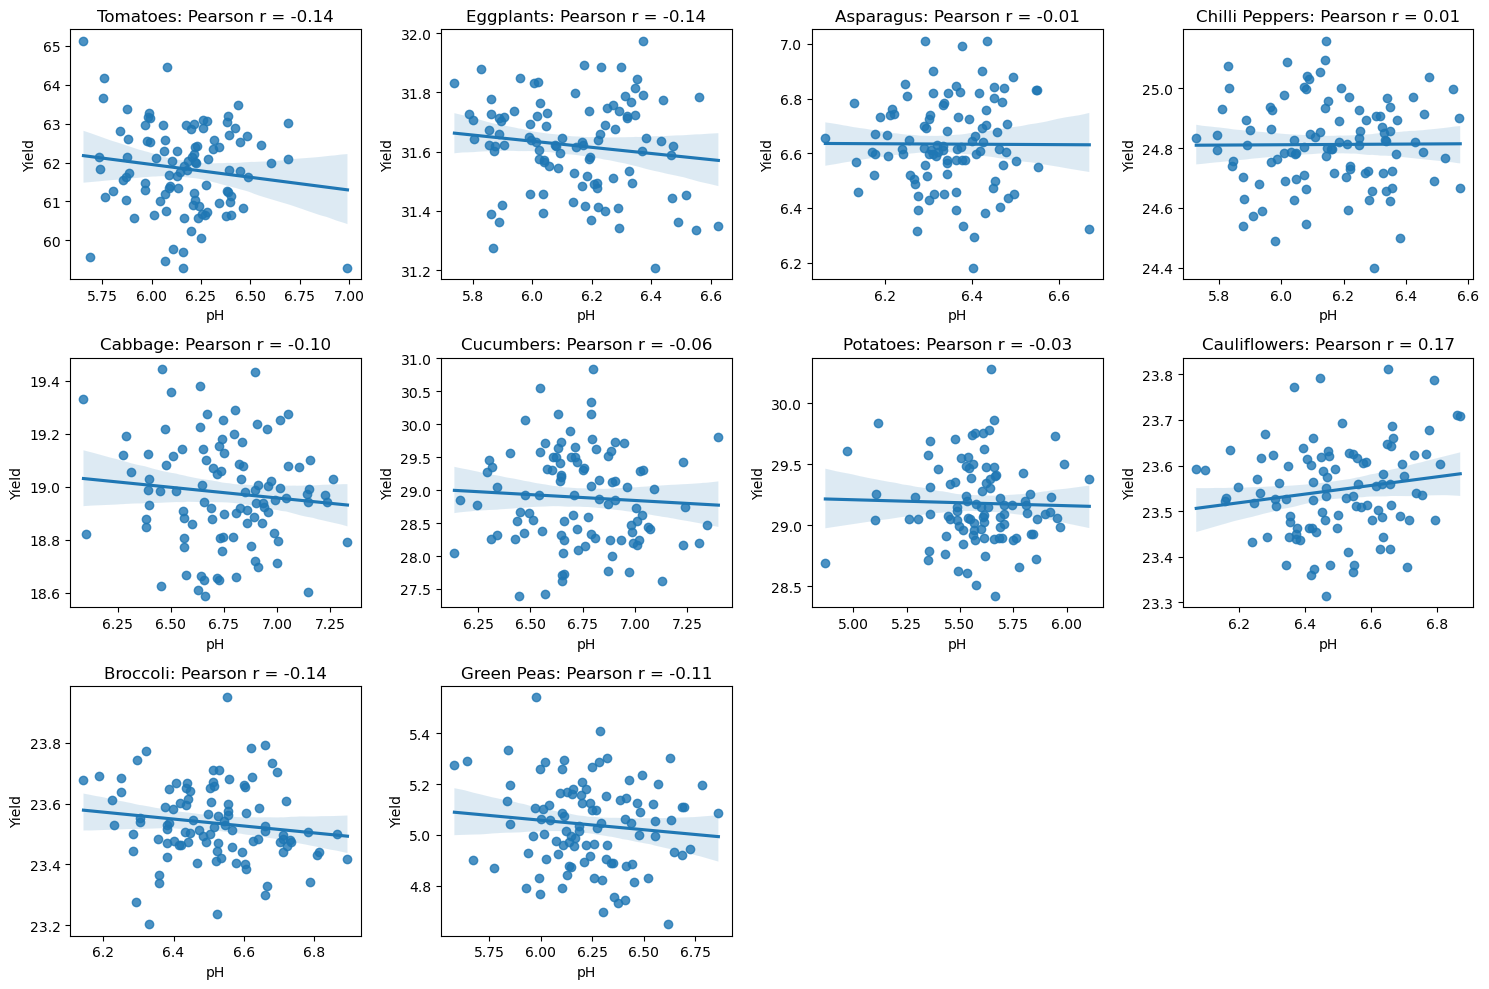

In [69]:
#plot scatter plots with regression lines for pH, correlation and yield
plt.figure(figsize=(15, 10))
for i, veg in enumerate(veg_data['Name'].unique(), 1):
    plt.subplot(3, 4, i)
    sns.regplot(data=veg_data[veg_data['Name'] == veg], x='pH', y='Yield')
    plt.title(f"{veg}: Pearson r = {corr_results[veg][0]:.2f}")
    plt.xlabel('pH')
    plt.ylabel('Yield')
plt.tight_layout()
plt.show()


### How can pH and NPK Be incorporated in Models

pH:

- pH affects nutrient availability in the soil. Most plants have an optimal pH range where they can absorb nutrients efficiently.
- For example, pH influences the solubility of minerals and nutrients, which directly impacts plant health and yield.

NPK Ratio:

- The NPK ratio (Nitrogen, Phosphorus, Potassium) represents the primary nutrients required by plants.
- Different crops have specific NPK requirements for optimal growth. For example, leafy vegetables often require more nitrogen, while root crops may need more phosphorus and potassium.

**Strategies**

- Adjust Synthetic Data Ranges:

    - Adjust the pH and NPK ranges to reflect more realistic scenarios. This includes varying pH and NPK values within a range rather than using static values.
    - Consider how pH and NPK interact. For example, if the pH is outside the optimal range, the effectiveness of the NPK ratio may be reduced.

- Feature Engineering:

    - Interaction Terms: Create interaction terms between pH and NPK components. For example, pH * N, pH * P, and pH * K.
    - Categorical Variables: Convert pH into categorical variables (e.g., acidic, neutral, alkaline) to capture non-linear relationships.
    -Composite Indices: Develop indices that combine pH and NPK values to reflect overall soil fertility.


Modeling Considerations:

- Classification Models: Use classification models to predict the suitability of growing conditions for each crop. - - Incorporate pH and NPK as key features.
- Regression Models: Once suitability is established, use regression models to predict yield, including interaction terms and composite indices.


## Adjust Ranges